In [2]:
import torch
import time
from tqdm import tqdm
import numpy as np
import matplotlib.pyplot as plt  


In [3]:
def create_matrix_cache(n):  
    cache = {}
    matrix_size = 512
    for i in tqdm(range(n)):
        matrix_size += 512
        x = torch.randn(matrix_size, matrix_size)
        y =  torch.randn(matrix_size, matrix_size)
        cache[i] = (x,y)
        
    return cache

matrix_cache = create_matrix_cache(32)

print("matrix cache initialized")

100%|██████████| 32/32 [00:55<00:00,  1.73s/it]

matrix cache initialized


In [4]:
if torch.backends.mps.is_available():
    device  = torch.device("mps")
    x = torch.ones(1, device=device)
    print (x)
else:
    device  = torch.device("cpu")
    print ("MPS device not found.")

matrix_cache_gpu =  {k: (v[0].to(device),v[1].to(device))  for k, v in tqdm(matrix_cache.items())}
print("matrix_cache_gpu initialized")

tensor([1.], device='mps:0')


100%|██████████| 32/32 [00:02<00:00, 14.26it/s]

matrix_cache_gpu initialized


tensor([1.], device='mps:0')


100%|██████████| 20/20 [00:53<00:00,  2.70s/it]


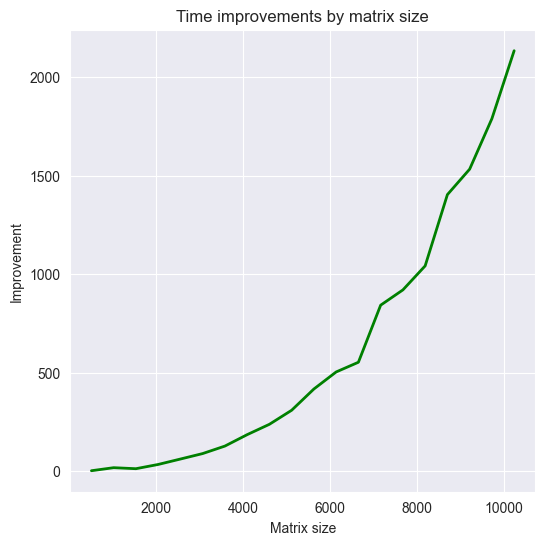

In [5]:

if torch.backends.mps.is_available():
    device  = torch.device("mps")
    x = torch.ones(1, device=device)
    print (x)
else:
    device  = torch.device("cpu")
    print ("MPS device not found.")

def measure_multiplication(x,y) :
    start = time.time()
    result = torch.matmul(x, y)
    end = time.time()
    return end - start

def multiplication_compare(n, matrix_size, measure_cpu=True) :
    sum_cpu = 0
    sum_gpu = 0
    x, y = matrix_cache[matrix_size/512-1]
    xg, yg = matrix_cache_gpu[matrix_size/512-1]
    for i in  range(n):
        if measure_cpu :
            sum_cpu += measure_multiplication(x,y)
        sum_gpu += measure_multiplication(xg, yg)
    return (sum_cpu, sum_gpu)
    
def print_result(n, summary, matrix_size) :
    sum_cpu, sum_gpu = summary
    ratio = sum_cpu/sum_gpu
    print(f"float32 matrix ({matrix_size} x {matrix_size}) multiplication,[CPU Speed: {1000*sum_cpu/n:.2f} ms] [GPU ({device}) Speed: {1000*sum_gpu/n:.2f} msec] improvement: {ratio:.0f}X")

def measure(iter, matrix_size, measure_cpu=True) :
    sum_cpu, sum_gpu = multiplication_compare(iter, matrix_size, measure_cpu)
    return (sum_cpu/iter, sum_gpu/iter ,sum_cpu/sum_gpu)
 

x = np.linspace(512,iter*512,iter, dtype = int)
m = [measure(10, n, True) for n in tqdm(x)]
y_improvement = [n[2] for n in m]
y_gpu = [n[1] for n in m]

plt.figure(figsize=(6, 6))
plt.plot(x, y_improvement, color="green",linewidth=2)
plt.xlabel('Matrix size')
plt.ylabel('Improvement')
plt.title('Time improvements by matrix size')
plt.show()